In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load encoded datasets
dataset_10 = pd.read_csv('C:/Users/juhan/OneDrive - Heriot-Watt University/Year 4/F20DL/csv/data_encoded_10_features.csv')
dataset_20 = pd.read_csv('C:/Users/juhan/OneDrive - Heriot-Watt University/Year 4/F20DL/csv/data_encoded_20_features.csv')
dataset_37 = pd.read_csv('C:/Users/juhan/OneDrive - Heriot-Watt University/Year 4/F20DL/csv/data_encoded_37_features.csv')

In [5]:
# Separate features and target
X_10, y_10 = dataset_10.drop(columns=['HeartDisease_Yes']), dataset_10['HeartDisease_Yes']
X_20, y_20 = dataset_20.drop(columns=['HeartDisease_Yes']), dataset_20['HeartDisease_Yes']
X_37, y_37 = dataset_37.drop(columns=['HeartDisease_Yes']), dataset_37['HeartDisease_Yes']

In [7]:
# Split datasets into training and testing sets
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_10, y_10, test_size=0.2, random_state=42)
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X_20, y_20, test_size=0.2, random_state=42)
X_train_37, X_test_37, y_train_37, y_test_37 = train_test_split(X_37, y_37, test_size=0.2, random_state=42)

In [9]:
# Initialize logistic regression models
log_reg_10 = LogisticRegression(max_iter=1000, random_state=42)
log_reg_20 = LogisticRegression(max_iter=1000, random_state=42)
log_reg_37 = LogisticRegression(max_iter=1000, random_state=42)

In [11]:
# Train the models
log_reg_10.fit(X_train_10, y_train_10)
log_reg_20.fit(X_train_20, y_train_20)
log_reg_37.fit(X_train_37, y_train_37)

LogisticRegression(max_iter=1000, random_state=42)

In [13]:
# Predictions for each dataset
y_pred_10 = log_reg_10.predict(X_test_10)
y_pred_20 = log_reg_20.predict(X_test_20)
y_pred_37 = log_reg_37.predict(X_test_37)

In [15]:
# Calculate performance metrics
metrics = {}
for name, y_test, y_pred, model, X_train, y_train in [
    ("10 Features", y_test_10, y_pred_10, log_reg_10, X_train_10, y_train_10),
    ("20 Features", y_test_20, y_pred_20, log_reg_20, X_train_20, y_train_20),
    ("37 Features", y_test_37, y_pred_37, log_reg_37, X_train_37, y_train_37)
]:
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Cross-validate for ROC and AUC
    y_scores = cross_val_predict(model, X_train, y_train, cv=3, method="predict_proba")[:, 1]
    fpr, tpr, _ = roc_curve(y_train, y_scores)
    auc = roc_auc_score(y_train, y_scores)
    
    # Store the results
    metrics[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC": auc,
        "y_test": y_test,
        "y_pred": y_pred
    }
    metrics[name]["fpr"] = fpr
    metrics[name]["tpr"] = tpr

# Print results
for dataset, metric_values in metrics.items():
    print(f"\nResults for {dataset} Dataset:")
    for metric, value in metric_values.items():
        if metric in ["fpr", "tpr", "y_test", "y_pred"]:
            continue
        print(f"{metric}: {value:.2f}")


Results for 10 Features Dataset:
Accuracy: 0.91
Precision: 0.52
Recall: 0.09
F1-Score: 0.15
AUC: 0.80

Results for 20 Features Dataset:
Accuracy: 0.91
Precision: 0.54
Recall: 0.10
F1-Score: 0.17
AUC: 0.83

Results for 37 Features Dataset:
Accuracy: 0.91
Precision: 0.53
Recall: 0.11
F1-Score: 0.18
AUC: 0.84


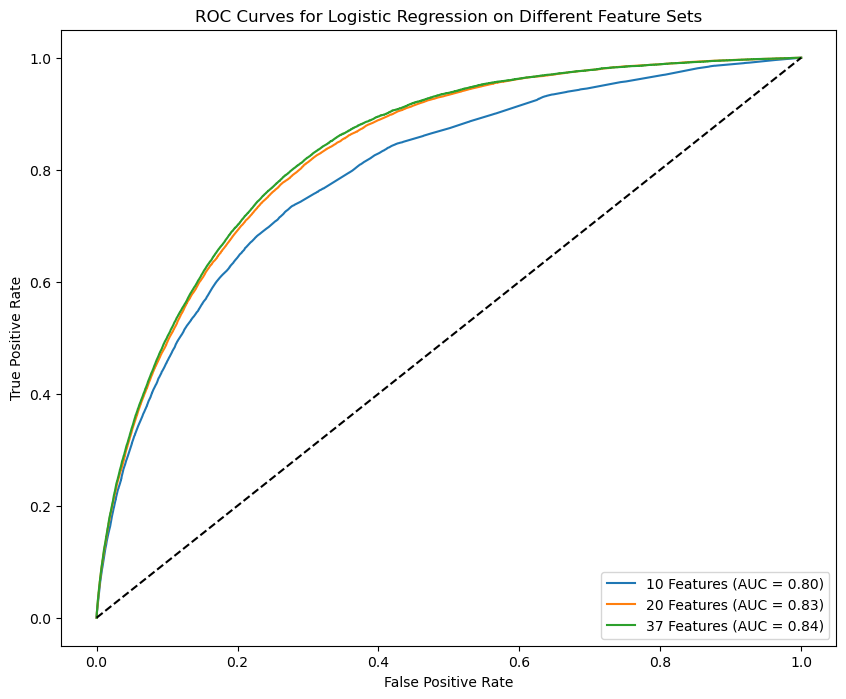

In [17]:
# Plot ROC Curves
plt.figure(figsize=(10, 8))
for dataset, values in metrics.items():
    plt.plot(values["fpr"], values["tpr"], label=f"{dataset} (AUC = {values['AUC']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression on Different Feature Sets')
plt.legend(loc="lower right")
plt.show()

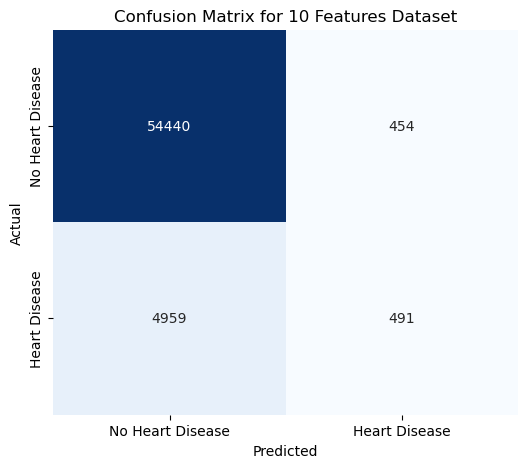

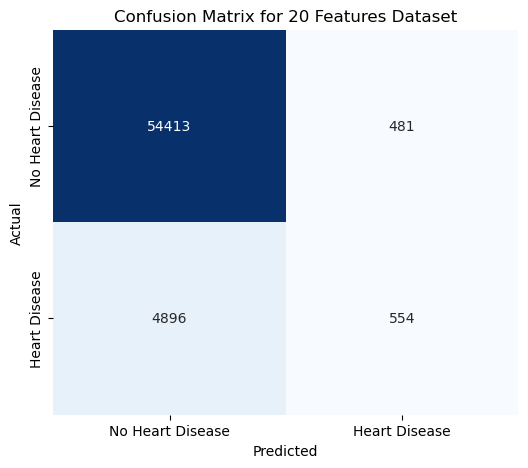

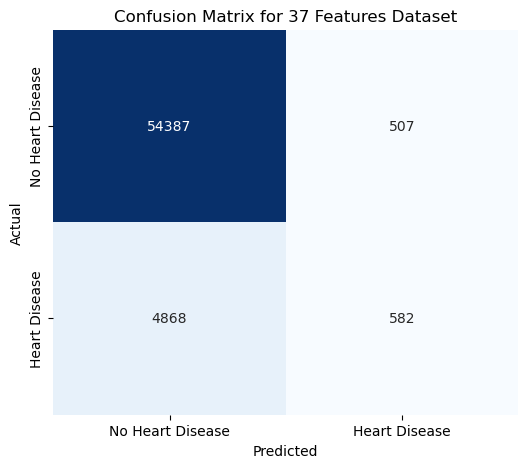

In [19]:
# Confusion Matrices
for dataset, values in metrics.items():
    cm = confusion_matrix(values["y_test"], values["y_pred"])
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Heart Disease', 'Heart Disease'],
                yticklabels=['No Heart Disease', 'Heart Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {dataset} Dataset')
    plt.show()

In [21]:
# Load encoded datasets
undersampled_dataset_10 = pd.read_csv('C:/Users/juhan/OneDrive - Heriot-Watt University/Year 4/F20DL/csv/resample_encoded_10_features.csv')
undersampled_dataset_20 = pd.read_csv('C:/Users/juhan/OneDrive - Heriot-Watt University/Year 4/F20DL/csv/resample_encoded_20_features.csv')
undersampled_dataset_37 = pd.read_csv('C:/Users/juhan/OneDrive - Heriot-Watt University/Year 4/F20DL/csv/resample_encoded_37_features.csv')

In [23]:
# Separate features and target
X_undersampled_10, y_undersampled_10 = undersampled_dataset_10.drop(columns=['HeartDisease_Yes']), undersampled_dataset_10['HeartDisease_Yes']
X_undersampled_20, y_undersampled_20 = undersampled_dataset_20.drop(columns=['HeartDisease_Yes']), undersampled_dataset_20['HeartDisease_Yes']
X_undersampled_37, y_undersampled_37 = undersampled_dataset_37.drop(columns=['HeartDisease_Yes']), undersampled_dataset_37['HeartDisease_Yes']

In [25]:
# Split datasets into training and testing sets
X_train_undersampled_10, X_test_undersampled_10, y_train_undersampled_10, y_test_undersampled_10 = train_test_split(X_undersampled_10, y_undersampled_10, test_size=0.2, random_state=42)
X_train_undersampled_20, X_test_undersampled_20, y_train_undersampled_20, y_test_undersampled_20 = train_test_split(X_undersampled_20, y_undersampled_20, test_size=0.2, random_state=42)
X_train_undersampled_37, X_test_undersampled_37, y_train_undersampled_37, y_test_undersampled_37 = train_test_split(X_undersampled_37, y_undersampled_37, test_size=0.2, random_state=42)

In [27]:
# Initialize logistic regression models
log_reg_undersampled_10 = LogisticRegression(max_iter=1000, random_state=42)
log_reg_undersampled_20 = LogisticRegression(max_iter=1000, random_state=42)
log_reg_undersampled_37 = LogisticRegression(max_iter=1000, random_state=42)

In [29]:
# Train the models
log_reg_undersampled_10.fit(X_train_undersampled_10, y_train_undersampled_10)
log_reg_undersampled_20.fit(X_train_undersampled_20, y_train_undersampled_20)
log_reg_undersampled_37.fit(X_train_undersampled_37, y_train_undersampled_37)

LogisticRegression(max_iter=1000, random_state=42)

In [31]:
# Predictions for each dataset
y_pred_undersampled_10 = log_reg_undersampled_10.predict(X_test_undersampled_10)
y_pred_undersampled_20 = log_reg_undersampled_20.predict(X_test_undersampled_20)
y_pred_undersampled_37 = log_reg_undersampled_37.predict(X_test_undersampled_37)

In [33]:
# Calculate performance metrics
metrics = {}
for name, y_test, y_pred, model, X_train, y_train in [
    ("10 Features", y_test_undersampled_10, y_pred_undersampled_10, log_reg_undersampled_10, X_train_undersampled_10, y_train_undersampled_10),
    ("20 Features", y_test_undersampled_20, y_pred_undersampled_20, log_reg_undersampled_20, X_train_undersampled_20, y_train_undersampled_20),
    ("37 Features", y_test_undersampled_37, y_pred_undersampled_37, log_reg_undersampled_37, X_train_undersampled_37, y_train_undersampled_37)
]:
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Cross-validate for ROC and AUC
    y_scores = cross_val_predict(model, X_train, y_train, cv=3, method="predict_proba")[:, 1]
    fpr, tpr, _ = roc_curve(y_train, y_scores)
    auc = roc_auc_score(y_train, y_scores)
    
    # Store the results
    metrics[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC": auc,
        "y_test": y_test,
        "y_pred": y_pred
    }
    metrics[name]["fpr"] = fpr
    metrics[name]["tpr"] = tpr

# Print results
for dataset, metric_values in metrics.items():
    print(f"\nResults for {dataset} Dataset (Undersampled):")
    for metric, value in metric_values.items():
        if metric in ["fpr", "tpr", "y_test", "y_pred"]:
            continue
        print(f"{metric}: {value:.2f}")


Results for 10 Features Dataset (Undersampled):
Accuracy: 0.71
Precision: 0.74
Recall: 0.67
F1-Score: 0.70
AUC: 0.79

Results for 20 Features Dataset (Undersampled):
Accuracy: 0.76
Precision: 0.75
Recall: 0.78
F1-Score: 0.76
AUC: 0.83

Results for 37 Features Dataset (Undersampled):
Accuracy: 0.76
Precision: 0.75
Recall: 0.79
F1-Score: 0.77
AUC: 0.84


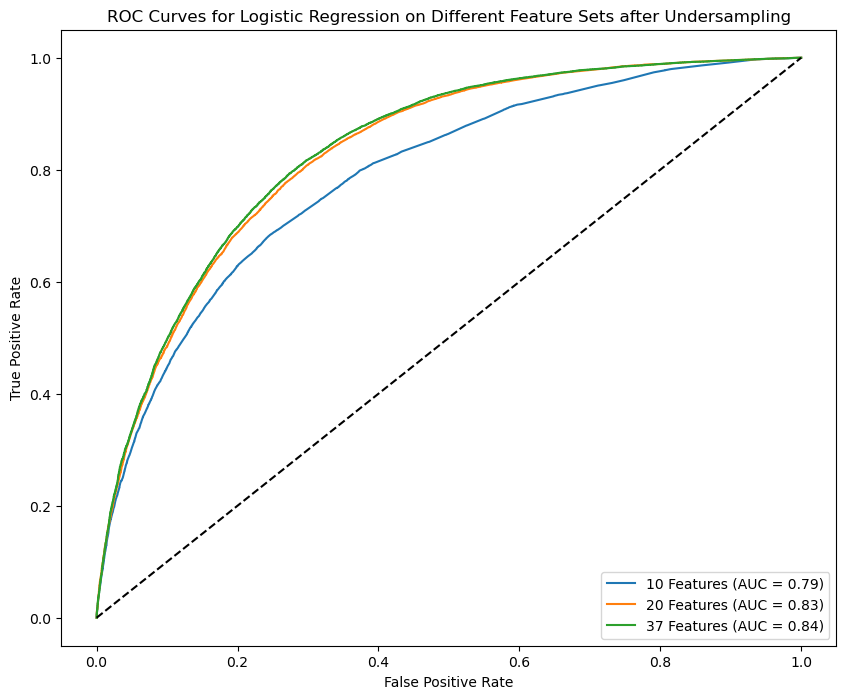

In [35]:
# Plot ROC Curves
plt.figure(figsize=(10, 8))
for dataset, values in metrics.items():
    plt.plot(values["fpr"], values["tpr"], label=f"{dataset} (AUC = {values['AUC']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression on Different Feature Sets after Undersampling')
plt.legend(loc="lower right")
plt.show()

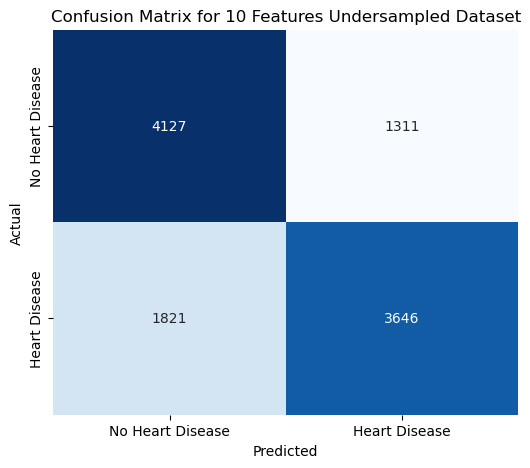

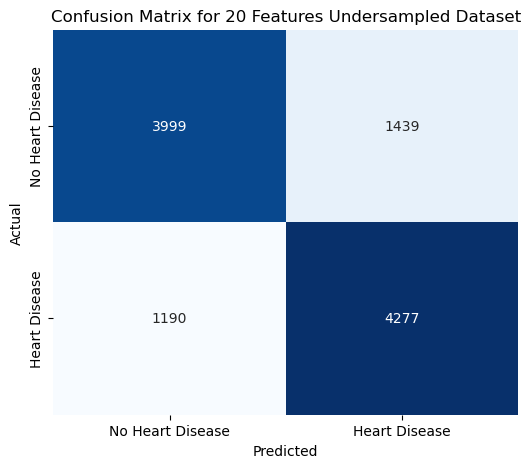

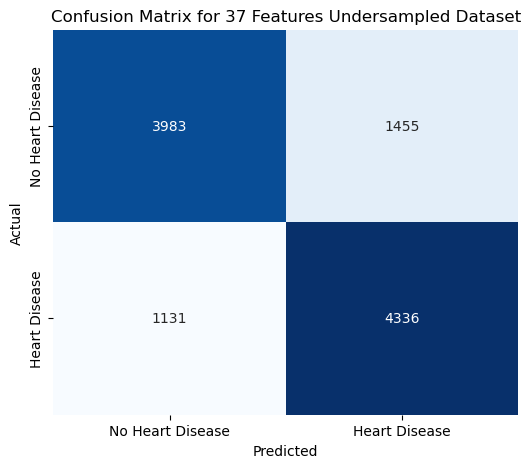

In [39]:
# Confusion Matrices
for dataset, values in metrics.items():
    cm = confusion_matrix(values["y_test"], values["y_pred"])
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Heart Disease', 'Heart Disease'],
                yticklabels=['No Heart Disease', 'Heart Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {dataset} Undersampled Dataset')
    plt.show()